In [31]:
import numpy as np
import pandas as pd
import sklearn
import time
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import GridSearchCV,train_test_split
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from xgboost import plot_importance
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
# from sklearn.cluster import KMeans
import category_encoders as ce
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
pd.set_option('display.max_columns', None)

dtrain=pd.read_csv("C:/Users/T160/pythonworks/aidea_leave_job/train.csv")
season=pd.read_csv("C:/Users/T160/pythonworks/aidea_leave_job/season.csv")
dtest=pd.read_csv("C:/Users/T160/pythonworks/aidea_leave_job/test.csv")
dtrain

,yyyy,PerNo,PerStatus,sex,工作分類,職等,廠區代碼,管理層級,工作資歷1,工作資歷2,工作資歷3,工作資歷4,工作資歷5,專案時數,專案總數,當前專案角色,特殊專案佔比,工作地點,訓練時數A,訓練時數B,訓練時數C,生產總額,榮譽數,是否升遷,升遷速度,近三月請假數A,近一年請假數A,近三月請假數B,近一年請假數B,出差數A,出差數B,出差集中度,年度績效等級A,年度績效等級B,年度績效等級C,年齡層級,婚姻狀況,年資層級A,年資層級B,年資層級C,任職前工作平均年數,最高學歷,畢業學校類別,畢業科系類別,眷屬量,通勤成本,歸屬部門
0,2014,1,0,1.0,1.0,3.0,19.0,4.0,0.0,1.0,1.0,0.0,0.0,23.0,1.0,1.0,3.0,6.0,0.0,0.0,5.0,7.0,1.0,1.0,1.0,3.0,5.0,0.0,0.0,5.0,0.0,9.0,2.0,10.0,4.0,6.0,1.0,2.0,1.0,1.0,2.0,NaN,NaN,5.0,0.0,8.0,19138.0
1,2015,1,0,1.0,1.0,3.0,19.0,6.0,0.0,1.0,1.0,0.0,0.0,23.0,2.0,1.0,1.0,6.0,0.0,0.0,8.0,9.0,2.0,0.0,1.0,4.0,6.0,0.0,0.0,3.0,1.0,4.0,2.0,1.0,5.0,7.0,1.0,2.0,2.0,1.0,2.0,NaN,NaN,5.0,2.0,8.0,19138.0
2,2016,1,0,1.0,1.0,3.0,19.0,6.0,0.0,1.0,1.0,0.0,0.0,23.0,3.0,5.0,1.0,6.0,2.0,0.0,5.0,10.0,2.0,0.0,1.0,4.0,7.0,0.0,0.0,2.0,1.0,2.0,2.0,1.0,2.0,7.0,1.0,2.0,2.0,1.0,2.0,NaN,NaN,5.0,2.0,8.0,19138.0
3,2017,1,0,1.0,1.0,3.0,19.0,6.0,0.0,1.0,1.0,0.0,0.0,23.0,4.0,5.0,5.0,6.0,0.0,0.0,10.0,8.0,2.0,0.0,2.0,5.0,5.0,0.0,0.0,2.0,1.0,1.0,2.0,8.0,5.0,7.0,1.0,2.0,2.0,1.0,2.0,NaN,NaN,5.0,2.0,8.0,19138.0
4,2014,3,0,0.0,1.0,4.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,23.0,4.0,5.0,1.0,6.0,0.0,0.0,1.0,8.0,0.0,0.0,6.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,6.0,4.0,2.0,9.0,1.0,5.0,5.0,0.0,0.0,2.0,4.0,1.0,2.0,8.0,8181.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14387,2014,8774,0,1.0,1.0,7.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,23.0,1.0,5.0,0.0,5.0,0.0,0.0,1.0,2.0,1.0,0.0,5.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,10.0,1.0,6.0,5.0,2.0,1.0,3.0,3.0,8.0,2.0,8.0,8012.0
14388,2015,8774,0,1.0,1.0,7.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,22.0,1.0,5.0,0.0,5.0,0.0,0.0,0.0,2.0,1.0,0.0,5.0,2.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,10.0,1.0,6.0,5.0,2.0,1.0,3.0,3.0,8.0,2.0,8.0,8012.0
14389,2016,8774,0,1.0,1.0,7.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,23.0,1.0,5.0,0.0,5.0,0.0,0.0,1.0,1.0,1.0,0.0,5.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,11.0,1.0,7.0,6.0,2.0,1.0,3.0,3.0,8.0,2.0,8.0,8012.0
14390,2017,8774,0,1.0,1.0,7.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,23.0,1.0,5.0,1.0,5.0,0.0,0.0,1.0,1.0,0.0,0.0,5.0,2.0,5.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,11.0,1.0,7.0,6.0,2.0,1.0,3.0,3.0,8.0,2.0,8.0,8012.0


In [32]:
dtrain.rename(columns={'yyyy':'年份','PerNo':'個人編號','PerStatus':'離職與否','sex':'性別'}, inplace=True)
dtest.rename(columns={'yyyy':'年份','PerNo':'個人編號','PerStatus':'離職與否','sex':'性別'}, inplace=True)
season.rename(columns={'yyyy':'年份','PerNo':'個人編號','periodQ':'季'}, inplace=True)
del dtest['離職與否']

def pro_key(df):
    key=[]
    for i in range(0,len(df)):
        key.append(i+1)
    df['流水號']=key
    return df
dtrain=pro_key(dtrain)
dtest=pro_key(dtest)

In [33]:
# leave percent
print('未離職', round(dtrain['離職與否'].value_counts()[0]/len(dtrain) * 100,2), '% of the dataset')
print('已離職', round(dtrain['離職與否'].value_counts()[1]/len(dtrain) * 100,2), '% of the dataset')

未離職 94.47 % of the dataset
已離職 5.53 % of the dataset


In [34]:
# del dtrain['最高學歷']
# find out rows which have nan values
# nan_rows = dtrain[dtrain.isnull().any(1)]
dtrain.isna().sum()

年份              0
個人編號            0
離職與否            0
性別             73
工作分類           73
職等             73
廠區代碼           73
管理層級           73
工作資歷1          73
工作資歷2          73
工作資歷3          73
工作資歷4          73
工作資歷5          73
專案時數           73
專案總數           73
當前專案角色         73
特殊專案佔比         73
工作地點           73
訓練時數A          73
訓練時數B          73
訓練時數C          73
生產總額           73
榮譽數            73
是否升遷           73
升遷速度           73
近三月請假數A        73
近一年請假數A        73
近三月請假數B        73
近一年請假數B        73
出差數A           73
出差數B           73
出差集中度          73
年度績效等級A        73
年度績效等級B        73
年度績效等級C        73
年齡層級           73
婚姻狀況           73
年資層級A          73
年資層級B          73
年資層級C          73
任職前工作平均年數      73
最高學歷         5326
畢業學校類別       3841
畢業科系類別         73
眷屬量            73
通勤成本           73
歸屬部門           73
流水號             0
dtype: int64

In [35]:
# 這些類別標籤是1好還是2好
# 為何null都是73筆?選取為null的資料
# 工作資歷1-5似乎是one-hot encoding
# 將perNo一樣的groupby?參考season
# selectkbest=>model=>pipeline合併二者=>fit,predict


In [36]:
season.drop(season[season.年份 > 2017 ].index, inplace=True)
season.drop(columns=['季'], inplace=True)
season=season.groupby(['年份','個人編號']).sum()

# merge on 年份 個人編號，season只取2017，2018的跟test conacat 
dtrain=pd.merge(dtrain,season,how='inner',on=['年份','個人編號'])
dtrain

,年份,個人編號,離職與否,性別,工作分類,職等,廠區代碼,管理層級,工作資歷1,工作資歷2,工作資歷3,工作資歷4,工作資歷5,專案時數,專案總數,當前專案角色,特殊專案佔比,工作地點,訓練時數A,訓練時數B,訓練時數C,生產總額,榮譽數,是否升遷,升遷速度,近三月請假數A,近一年請假數A,近三月請假數B,近一年請假數B,出差數A_x,出差數B_x,出差集中度,年度績效等級A,年度績效等級B,年度績效等級C,年齡層級,婚姻狀況,年資層級A,年資層級B,年資層級C,任職前工作平均年數,最高學歷,畢業學校類別,畢業科系類別,眷屬量,通勤成本,歸屬部門,流水號,加班數,出差數A_y,出差數B_y,請假數A,請假數B
0,2014,1,0,1.0,1.0,3.0,19.0,4.0,0.0,1.0,1.0,0.0,0.0,23.0,1.0,1.0,3.0,6.0,0.0,0.0,5.0,7.0,1.0,1.0,1.0,3.0,5.0,0.0,0.0,5.0,0.0,9.0,2.0,10.0,4.0,6.0,1.0,2.0,1.0,1.0,2.0,NaN,NaN,5.0,0.0,8.0,19138.0,1,3,21,0,8,0
1,2015,1,0,1.0,1.0,3.0,19.0,6.0,0.0,1.0,1.0,0.0,0.0,23.0,2.0,1.0,1.0,6.0,0.0,0.0,8.0,9.0,2.0,0.0,1.0,4.0,6.0,0.0,0.0,3.0,1.0,4.0,2.0,1.0,5.0,7.0,1.0,2.0,2.0,1.0,2.0,NaN,NaN,5.0,2.0,8.0,19138.0,2,1,12,1,16,0
2,2016,1,0,1.0,1.0,3.0,19.0,6.0,0.0,1.0,1.0,0.0,0.0,23.0,3.0,5.0,1.0,6.0,2.0,0.0,5.0,10.0,2.0,0.0,1.0,4.0,7.0,0.0,0.0,2.0,1.0,2.0,2.0,1.0,2.0,7.0,1.0,2.0,2.0,1.0,2.0,NaN,NaN,5.0,2.0,8.0,19138.0,3,2,10,1,11,0
3,2017,1,0,1.0,1.0,3.0,19.0,6.0,0.0,1.0,1.0,0.0,0.0,23.0,4.0,5.0,5.0,6.0,0.0,0.0,10.0,8.0,2.0,0.0,2.0,5.0,5.0,0.0,0.0,2.0,1.0,1.0,2.0,8.0,5.0,7.0,1.0,2.0,2.0,1.0,2.0,NaN,NaN,5.0,2.0,8.0,19138.0,4,1,7,4,7,0
4,2014,3,0,0.0,1.0,4.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,23.0,4.0,5.0,1.0,6.0,0.0,0.0,1.0,8.0,0.0,0.0,6.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,6.0,4.0,2.0,9.0,1.0,5.0,5.0,0.0,0.0,2.0,4.0,1.0,2.0,8.0,8181.0,5,0,0,0,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14387,2014,8774,0,1.0,1.0,7.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,23.0,1.0,5.0,0.0,5.0,0.0,0.0,1.0,2.0,1.0,0.0,5.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,10.0,1.0,6.0,5.0,2.0,1.0,3.0,3.0,8.0,2.0,8.0,8012.0,14388,0,0,0,10,0
14388,2015,8774,0,1.0,1.0,7.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,22.0,1.0,5.0,0.0,5.0,0.0,0.0,0.0,2.0,1.0,0.0,5.0,2.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,10.0,1.0,6.0,5.0,2.0,1.0,3.0,3.0,8.0,2.0,8.0,8012.0,14389,0,0,0,22,0
14389,2016,8774,0,1.0,1.0,7.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,23.0,1.0,5.0,0.0,5.0,0.0,0.0,1.0,1.0,1.0,0.0,5.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,11.0,1.0,7.0,6.0,2.0,1.0,3.0,3.0,8.0,2.0,8.0,8012.0,14390,0,0,0,10,0
14390,2017,8774,0,1.0,1.0,7.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,23.0,1.0,5.0,1.0,5.0,0.0,0.0,1.0,1.0,0.0,0.0,5.0,2.0,5.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,11.0,1.0,7.0,6.0,2.0,1.0,3.0,3.0,8.0,2.0,8.0,8012.0,14391,4,1,0,9,0


In [37]:
season1=pd.read_csv("C:/Users/T160/pythonworks/aidea_leave_job/season.csv")
season1.rename(columns={'yyyy':'年份','PerNo':'個人編號','periodQ':'季'}, inplace=True)

season1.drop(season1[season1.年份 < 2018 ].index, inplace=True)
season1.drop(columns=['季'], inplace=True)
season1=season1.groupby(['年份','個人編號']).sum()
season1
# merge on 年份 個人編號，season 2018的跟test conacat 
dtest2=pd.merge(dtest,season1,how='inner',on=['年份','個人編號'])
dtest2

,年份,個人編號,性別,工作分類,職等,廠區代碼,管理層級,工作資歷1,工作資歷2,工作資歷3,工作資歷4,工作資歷5,專案時數,專案總數,當前專案角色,特殊專案佔比,工作地點,訓練時數A,訓練時數B,訓練時數C,生產總額,榮譽數,是否升遷,升遷速度,近三月請假數A,近一年請假數A,近三月請假數B,近一年請假數B,出差數A_x,出差數B_x,出差集中度,年度績效等級A,年度績效等級B,年度績效等級C,年齡層級,婚姻狀況,年資層級A,年資層級B,年資層級C,任職前工作平均年數,最高學歷,畢業學校類別,畢業科系類別,眷屬量,通勤成本,歸屬部門,流水號,加班數,出差數A_y,出差數B_y,請假數A,請假數B
0,2018,1,1.0,1.0,3.0,19.0,6.0,0.0,1.0,1.0,0.0,0.0,23.0,6.0,5.0,1.0,6.0,0.0,1.0,1.0,4.0,3.0,0.0,2.0,5.0,7.0,0.0,0.0,3.0,1.0,2.0,6.0,10.0,5.0,8.0,1.0,3.0,2.0,1.0,2.0,NaN,NaN,5.0,2.0,8.0,19138.0,1,0,11,5,10,0
1,2018,3,0.0,1.0,4.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,22.0,3.0,5.0,2.0,6.0,0.0,0.0,0.0,9.0,1.0,0.0,7.0,4.0,8.0,0.0,0.0,1.0,0.0,0.0,6.0,4.0,5.0,11.0,1.0,6.0,6.0,0.0,0.0,2.0,4.0,1.0,2.0,8.0,8181.0,2,0,3,0,13,0
2,2018,7,0.0,1.0,4.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,22.0,1.0,1.0,0.0,6.0,0.0,0.0,1.0,8.0,2.0,0.0,2.0,0.0,9.0,0.0,2.0,1.0,0.0,0.0,1.0,1.0,5.0,4.0,2.0,1.0,1.0,0.0,0.0,NaN,NaN,5.0,0.0,10.0,4010.0,3,5,3,0,12,5
3,2018,15,0.0,1.0,4.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,14.0,4.0,1.0,1.0,5.0,0.0,0.0,3.0,1.0,1.0,0.0,2.0,4.0,5.0,0.0,0.0,1.0,0.0,0.0,6.0,2.0,4.0,10.0,1.0,3.0,1.0,4.0,2.0,NaN,4.0,8.0,2.0,9.0,2177.0,4,0,4,0,6,0
4,2018,16,0.0,1.0,4.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,21.0,1.0,1.0,0.0,11.0,1.0,2.0,2.0,4.0,0.0,0.0,1.0,2.0,10.0,1.0,2.0,3.0,1.0,4.0,10.0,10.0,5.0,6.0,1.0,3.0,1.0,3.0,1.0,2.0,3.0,3.0,2.0,10.0,12072.0,5,0,13,2,15,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3734,2018,8761,1.0,1.0,7.0,20.0,1.0,0.0,0.0,0.0,0.0,0.0,23.0,1.0,5.0,0.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,0.0,0.0,1.0,0.0,0.0,10.0,7.0,2.0,6.0,2.0,2.0,1.0,1.0,1.0,2.0,NaN,5.0,0.0,8.0,20123.0,3735,1,1,0,7,0
3735,2018,8765,0.0,1.0,4.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,23.0,2.0,5.0,2.0,6.0,1.0,0.0,2.0,1.0,1.0,0.0,5.0,1.0,8.0,0.0,0.0,1.0,0.0,0.0,2.0,4.0,2.0,12.0,1.0,7.0,6.0,1.0,1.0,2.0,3.0,7.0,1.0,8.0,14053.0,3736,2,3,0,12,0
3736,2018,8767,1.0,1.0,4.0,13.0,1.0,0.0,0.0,0.0,1.0,1.0,23.0,3.0,5.0,1.0,6.0,0.0,0.0,0.0,3.0,1.0,0.0,1.0,4.0,7.0,0.0,0.0,2.0,1.0,2.0,10.0,8.0,5.0,3.0,2.0,2.0,2.0,0.0,0.0,2.0,4.0,7.0,0.0,8.0,13084.0,3737,2,9,1,10,0
3737,2018,8774,1.0,1.0,7.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,23.0,1.0,5.0,1.0,5.0,0.0,0.0,1.0,0.0,1.0,0.0,6.0,2.0,7.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,11.0,1.0,7.0,6.0,2.0,1.0,3.0,3.0,8.0,2.0,8.0,8012.0,3738,0,0,0,9,0


In [38]:
def features(dtrain):
    
    dtrain.fillna(-1,inplace=True)
    dtrain=dtrain.astype(float).astype(int)
    # 是否升遷=1時，升遷速度必定為1，推測原編碼 有升遷=0，沒升遷=1，交換兩者改為 有升遷=1，沒升遷=0
#     dtrain['是否升遷']=dtrain['是否升遷'].map({1:0,0:1,-1:-1})
    
    dtrain['總工作資歷']=dtrain['工作資歷1']+dtrain['工作資歷2']+dtrain['工作資歷3']+dtrain['工作資歷4']+dtrain['工作資歷5']
    dtrain['總訓練時數']=dtrain['訓練時數A']+dtrain['訓練時數B']+dtrain['訓練時數C']

    dtrain['近三月請假總數']=dtrain['近三月請假數A']+dtrain['近三月請假數B']
    dtrain['請假總數AB']=dtrain['請假數A']+dtrain['請假數B']
    dtrain['近一年請假總數']=dtrain['近一年請假數A']+dtrain['近一年請假數B']
    dtrain['近三月、一年與請假總數AB']=dtrain['近三月請假總數']+dtrain['近一年請假總數']+dtrain['請假總數AB']

    dtrain['出差總數_x']=dtrain['出差數A_x']+dtrain['出差數B_x']
    dtrain['出差總數_y']=dtrain['出差數A_y']+dtrain['出差數B_y']
    dtrain['出差總數_x*出差集中度']=dtrain['出差總數_x']*dtrain['出差集中度']
    dtrain['出差總數_y*出差集中度']=dtrain['出差總數_y']*dtrain['出差集中度']

    dtrain['年度績效等級ABC']=dtrain['年度績效等級A']+dtrain['年度績效等級B']+dtrain['年度績效等級C']
    dtrain['年資層級ABC']=dtrain['年資層級A']+dtrain['年資層級B']+dtrain['年資層級C']
    dtrain['平均專案時數']=dtrain['專案時數']/dtrain['專案總數']
    dtrain['特專x角色']=dtrain['特殊專案佔比']*dtrain['當前專案角色']
    dtrain['職等x管理層級']=dtrain['職等']*dtrain['管理層級']
    dtrain['職等x工作分類']=dtrain['職等']*dtrain['工作分類']
    dtrain['管理層級x工作分類']=dtrain['管理層級']*dtrain['工作分類']
    dtrain['婚姻狀況+眷屬量']=dtrain['婚姻狀況']+dtrain['眷屬量']
    dtrain['工作平均年數+年齡層級']=dtrain['任職前工作平均年數']+dtrain['年齡層級']
    dtrain['工作平均年數+總工作資歷']=dtrain['任職前工作平均年數']+dtrain['總工作資歷']
    dtrain['加班數+出差總數_x+請假總數AB']=dtrain['加班數']+dtrain['出差總數_x']+dtrain['請假總數AB']
    dtrain['加班數+出差總數_y+請假總數AB']=dtrain['加班數']+dtrain['出差總數_x']+dtrain['請假總數AB']
    dtrain['榮譽數+特殊專案佔比']=dtrain['榮譽數']+dtrain['特殊專案佔比']


    dtrain['編號出現年份']=dtrain.groupby(['個人編號'])['流水號'].transform('count')
    dtrain['是否升遷x升遷速度']=dtrain['是否升遷']*dtrain['升遷速度']
    dtrain['是否升遷+升遷速度']=dtrain['是否升遷']+dtrain['升遷速度']

    dtrain['同部門人數']=dtrain.groupby(['歸屬部門'])['流水號'].transform('count')
    dtrain['同管理階層人數']=dtrain.groupby(['管理層級'])['流水號'].transform('count')
    dtrain['同職等人數']=dtrain.groupby(['職等'])['流水號'].transform('count')
    dtrain['同畢業學校類別人數']=dtrain.groupby(['畢業學校類別'])['流水號'].transform('count')
    dtrain['同廠區人數']=dtrain.groupby(['廠區代碼'])['流水號'].transform('count')
    dtrain['同工作地點人數']=dtrain.groupby(['工作地點'])['流水號'].transform('count')
    
    # fillna 
    dtrain.fillna(-1,inplace=True)
    dtrain=dtrain.astype(float).astype(int)
    
    return dtrain

dtrain=features(dtrain)
dtest2=features(dtest2)

In [39]:
col=[c for c in dtrain.columns if c not in ['年份','個人編號','離職與否','流水號']]
# one hot
ce_one_hot = ce.OneHotEncoder(cols = cols)
dtrain1=ce_one_hot.fit_transform(dtrain[cols], dtrain['離職與否'])

C:\Users\T160\AppData\Local\Programs\Python\Python37\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [40]:
dtrain1

個人編號_1  個人編號_2  個人編號_3  個人編號_4  個人編號_5  個人編號_6  個人編號_7  個人編號_8  個人編號_9  \
0           1       0       0       0       0       0       0       0       0   
1           1       0       0       0       0       0       0       0       0   
2           1       0       0       0       0       0       0       0       0   
3           1       0       0       0       0       0       0       0       0   
4           0       1       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
14387       0       0       0       0       0       0       0       0       0   
14388       0       0       0       0       0       0       0       0       0   
14389       0       0       0       0       0       0       0       0       0   
14390       0       0       0       0       0       0       0       0       0   
14391       0       0       0       0       0       0       0       0       0   

       個人編號_10  個人編號_11  個人編號_12  個人編號_13  個人編號_14  個人編號_15  個人編號_16  個人編號_17  \
0            0        0        0        0        0        0        0        0   
1            0        0        0        0        0        0        0        0   
2            0        0        0        0        0        0        0        0   
3            0        0        0        0        0        0        0        0   
4            0        0        0        0        0        0        0        0   
...        ...      ...      ...      ...      ...      ...      ...      ...   
14387        0        0        0        0        0        0        0        0   
14388        0        0        0        0        0        0        0        0   
14389        0        0        0        0        0        0        0        0   
14390        0        0        0        0        0        0        0        0   
14391        0        0        0        0        0        0        0        0   

       個人編號_18  個人編號_19  個人編號_20  個人編號_21  個人編號_22  個人編號_23  個人編號_24  個人編號_25  \
0            0        0        0        0        0        0        0        0   
1            0        0        0        0        0        0        0        0   
2            0        0        0        0        0        0        0        0   
3            0        0        0        0        0        0        0        0   
4            0        0        0        0        0        0        0        0   
...        ...      ...      ...      ...      ...      ...      ...      ...   
14387        0        0        0        0        0        0        0        0   
14388        0        0        0        0        0        0        0        0   
14389        0        0        0        0        0        0        0        0   
14390        0        0        0        0        0        0        0        0   
14391        0        0        0        0        0        0        0        0   

       個人編號_26  個人編號_27  個人編號_28  個人編號_29  個人編號_30  個人編號_31  個人編號_32  個人編號_33  \
0            0        0        0        0        0        0        0        0   
1            0        0        0        0        0        0        0        0   
2            0        0        0        0        0        0        0        0   
3            0        0        0        0        0        0        0        0   
4            0        0        0        0        0        0        0        0   
...        ...      ...      ...      ...      ...      ...      ...      ...   
14387        0        0        0        0        0        0        0        0   
14388        0        0        0        0        0        0        0        0   
14389        0        0        0        0        0        0        0        0   
14390        0        0        0        0        0        0        0        0   
14391        0        0        0        0        0        0        0        0   

       個人編號_34  個人編號_35  個人編號_36  個人編號_37  個人編號_38  個人編號_39  個人編號_40  個人編號_41  \
0            0        0        0  

In [ ]:
# leave one out encoding
ce_leave = ce.LeaveOneOutEncoder(cols = cols)
ce_leave.fit(dtrain[cols], dtrain['離職與否'])        
ce_leave.transform(dtrain[cols], dtrain['離職與否']) 

In [43]:
dtrain2=pd.read_csv("C:/Users/T160/pythonworks/aidea_leave_job/train.csv")
dtrain2.rename(columns={'yyyy':'年份','PerNo':'個人編號','PerStatus':'離職與否','sex':'性別'}, inplace=True)

In [44]:
cols=[c for c in dtrain.columns if c not in ['年份','離職與否','流水號']]

X_train, X_valid, y_train, y_valid = train_test_split(dtrain[cols], dtrain2['離職與否'], stratify= dtrain2['離職與否'],
                                                      test_size=0.3, random_state=777)


In [22]:
# from sklearn.decomposition import PCA
# # after 
# pca = PCA(n_components=2)
# pca_X_train=pca.fit_transform(dtrain[cols])
# pca_X_train=pca.inverse_transform(dtrain[cols])
# # plot 2D
# plt.figure(figsize=(8,6))
# plt.scatter(pca_X_train[:,0],pca_X_train[:,1],c= y_train,cmap='rainbow')
# plt.xlabel('First principal component')
# plt.ylabel('Second Principal Component')

In [23]:
# clustering

# k_dtrain3 = KMeans(n_clusters=3, random_state=777).fit(dtrain[cols])
# k_dtrain4 = KMeans(n_clusters=4, random_state=777).fit(dtrain[cols])

# dtrain['分3群']=k_dtrain3.labels_.tolist()
# dtrain['分4群']=k_dtrain4.labels_.tolist()

# from sklearn.cluster import DBSCAN
# cluster_dtrain = DBSCAN(eps=0.5, min_samples=10, metric='euclidean', 
#                         metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None).fit(dtrain)
# cluster_dtrain.labels_

# # function to get unique values 
# def unique(list1): 
  
#     # intilize a null list 
#     unique_list = [] 
      
#     # traverse for all elements 
#     for x in list1: 
#         # check if exists in unique_list or not 
#         if x not in unique_list: 
#             unique_list.append(x) 
#     # print list 
#     for x in unique_list: 
#         print (x)
        
# unique(cluster_dtrain.labels_)

In [45]:
%%time

xgbc = xgb.XGBClassifier(
                           learning_rate=0.1,
                           n_estimators=500,
                           silent=True,
                           objective='binary:logistic',
                           colsample_bytree=0.5,
#                            reg_lambda=0,
#                            seed=1
)

def f_beta(preds,dtrain):
    label = dtrain.get_label()
    preds = 1.0/(1.0+np.exp(-preds))
    pred = [int(i >= 0.5) for i in preds]
    tp = sum([int(i == 1 and j == 1) for i,j in zip(pred,label)])
    precision=float(tp)/sum(pred)
    recall=float(tp)/sum(label)
    return 'f_beta_score', 3.25 * (precision*recall)/((2.25*precision)+recall)

xgbc.fit(X_train, y_train, eval_metric=f_beta, eval_set=[(X_valid, y_valid)],verbose=True)

[22:27:10] WARNING: D:\Build\xgboost\xgboost-1.1.0.git\python-package\build\temp.win-amd64-3.7\Release\xgboost\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-error:0.04817	validation_0-f_beta_score:0.15996
[1]	validation_0-error:0.04470	validation_0-f_beta_score:0.15996
[2]	validation_0-error:0.04678	validation_0-f_beta_score:0.15996
[3]	validation_0-error:0.04493	validation_0-f_beta_score:0.15996
[4]	validation_0-error:0.04632	validation_0-f_beta_score:0.15996
[5]	validation_0-error:0.04539	validation_0-f_beta_score:0.15996
[6]	validation_0-error:0.04585	validation_0-f_beta_score:0.15996
[7]	validation_0-error:0.04585	validation_0-f_beta_score:0.15996
[8]	validation_0-error:0.04632	validation_0-f_beta_score:0.15996
[

[118]	validation_0-error:0.04076	validation_0-f_beta_score:0.15996
[119]	validation_0-error:0.04099	validation_0-f_beta_score:0.15996
[120]	validation_0-error:0.04099	validation_0-f_beta_score:0.15996
[121]	validation_0-error:0.04122	validation_0-f_beta_score:0.15996
[122]	validation_0-error:0.04122	validation_0-f_beta_score:0.15996
[123]	validation_0-error:0.04122	validation_0-f_beta_score:0.15996
[124]	validation_0-error:0.04122	validation_0-f_beta_score:0.15996
[125]	validation_0-error:0.04169	validation_0-f_beta_score:0.15996
[126]	validation_0-error:0.04169	validation_0-f_beta_score:0.15996
[127]	validation_0-error:0.04215	validation_0-f_beta_score:0.15996
[128]	validation_0-error:0.04192	validation_0-f_beta_score:0.15996
[129]	validation_0-error:0.04169	validation_0-f_beta_score:0.15996
[130]	validation_0-error:0.04169	validation_0-f_beta_score:0.15996
[131]	validation_0-error:0.04169	validation_0-f_beta_score:0.15996
[132]	validation_0-error:0.04169	validation_0-f_beta_score:0.1

[241]	validation_0-error:0.04238	validation_0-f_beta_score:0.15996
[242]	validation_0-error:0.04238	validation_0-f_beta_score:0.15996
[243]	validation_0-error:0.04261	validation_0-f_beta_score:0.15996
[244]	validation_0-error:0.04261	validation_0-f_beta_score:0.15996
[245]	validation_0-error:0.04261	validation_0-f_beta_score:0.15996
[246]	validation_0-error:0.04215	validation_0-f_beta_score:0.15996
[247]	validation_0-error:0.04215	validation_0-f_beta_score:0.15996
[248]	validation_0-error:0.04169	validation_0-f_beta_score:0.15996
[249]	validation_0-error:0.04145	validation_0-f_beta_score:0.15996
[250]	validation_0-error:0.04169	validation_0-f_beta_score:0.15996
[251]	validation_0-error:0.04145	validation_0-f_beta_score:0.15996
[252]	validation_0-error:0.04145	validation_0-f_beta_score:0.15996
[253]	validation_0-error:0.04169	validation_0-f_beta_score:0.15996
[254]	validation_0-error:0.04169	validation_0-f_beta_score:0.15996
[255]	validation_0-error:0.04169	validation_0-f_beta_score:0.1

[364]	validation_0-error:0.04192	validation_0-f_beta_score:0.15996
[365]	validation_0-error:0.04192	validation_0-f_beta_score:0.15996
[366]	validation_0-error:0.04215	validation_0-f_beta_score:0.15996
[367]	validation_0-error:0.04215	validation_0-f_beta_score:0.15996
[368]	validation_0-error:0.04215	validation_0-f_beta_score:0.15996
[369]	validation_0-error:0.04192	validation_0-f_beta_score:0.15996
[370]	validation_0-error:0.04215	validation_0-f_beta_score:0.15996
[371]	validation_0-error:0.04238	validation_0-f_beta_score:0.15996
[372]	validation_0-error:0.04192	validation_0-f_beta_score:0.15996
[373]	validation_0-error:0.04192	validation_0-f_beta_score:0.15996
[374]	validation_0-error:0.04215	validation_0-f_beta_score:0.15996
[375]	validation_0-error:0.04215	validation_0-f_beta_score:0.15996
[376]	validation_0-error:0.04192	validation_0-f_beta_score:0.15996
[377]	validation_0-error:0.04192	validation_0-f_beta_score:0.15996
[378]	validation_0-error:0.04192	validation_0-f_beta_score:0.1

[487]	validation_0-error:0.04261	validation_0-f_beta_score:0.15996
[488]	validation_0-error:0.04284	validation_0-f_beta_score:0.15996
[489]	validation_0-error:0.04284	validation_0-f_beta_score:0.15996
[490]	validation_0-error:0.04238	validation_0-f_beta_score:0.15996
[491]	validation_0-error:0.04261	validation_0-f_beta_score:0.15996
[492]	validation_0-error:0.04284	validation_0-f_beta_score:0.15996
[493]	validation_0-error:0.04261	validation_0-f_beta_score:0.15996
[494]	validation_0-error:0.04261	validation_0-f_beta_score:0.15996
[495]	validation_0-error:0.04261	validation_0-f_beta_score:0.15996
[496]	validation_0-error:0.04284	validation_0-f_beta_score:0.15996
[497]	validation_0-error:0.04261	validation_0-f_beta_score:0.15996
[498]	validation_0-error:0.04261	validation_0-f_beta_score:0.15996
[499]	validation_0-error:0.04261	validation_0-f_beta_score:0.15996
Wall time: 2min 56s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, silent=True,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

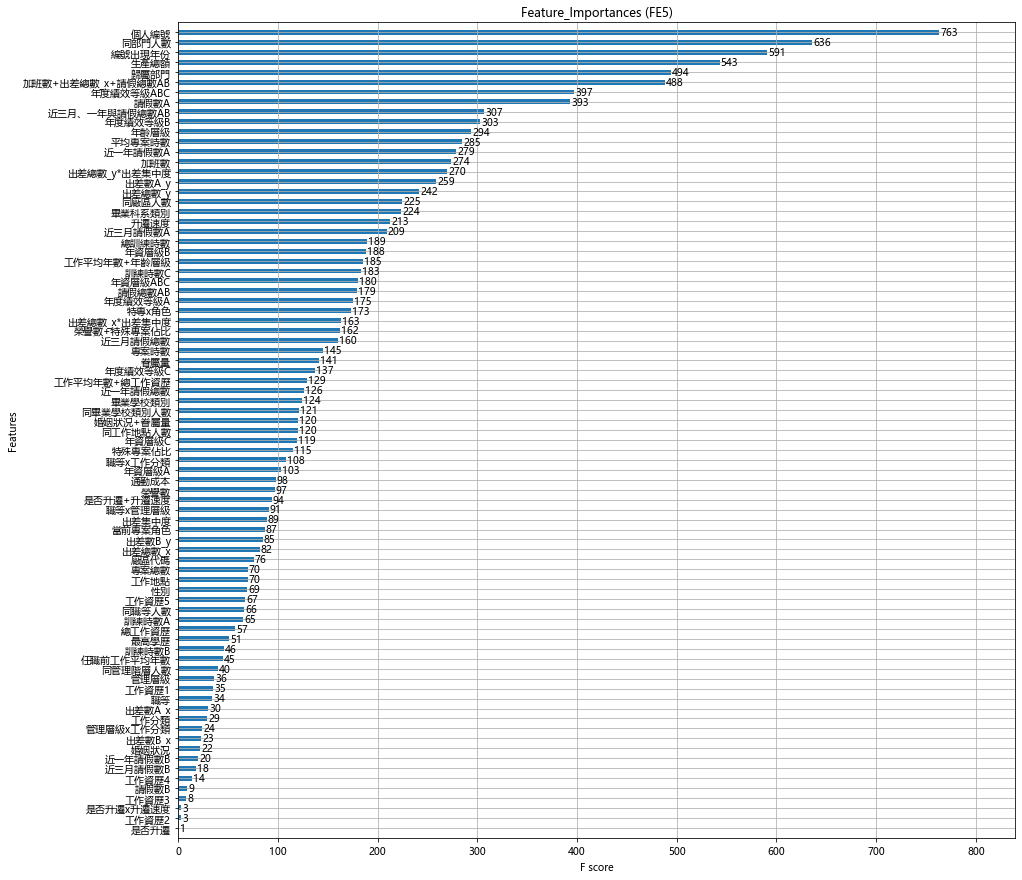

In [26]:
fig,ax = plt.subplots(figsize=(15,15))
plot_importance(xgbc,
                height=0.5,
                ax=ax,
#                 max_num_features=64
               )

plt.title('Feature_Importances (FE5)')
# plt.savefig("C:/Users/T160/pythonworks/aidea_leave_job/feature importance/Feature_Importances (FE5-xgb).png")
plt.show()

In [28]:
predictions=xgbc.predict(dtest2[cols])

results = pd.DataFrame({'PerNo':dtest2['個人編號'].values, 'PerStatus':predictions.astype(np.int32)})

results.to_csv('C:/Users/T160/pythonworks/aidea_leave_job/results.csv', index=False, float_format='%.4f')


In [ ]:
"""
%%time
from sklearn.model_selection import GridSearchCV

parameters = {
              'max_depth': [5, 10],
              'learning_rate': [0.01, 0.02, 0.1],
              'min_child_weight': [0, 2,10],
              'max_delta_step': [0, 0.2, 0.6],
              'colsample_bytree': [0.5, 0.7,0.9],
              'reg_alpha': [0, 0.25, 0.5],
              'reg_lambda': [0.2, 0.6, 1],
              'scale_pos_weight': [0.2,0.6, 1]

}

gsearch = GridSearchCV(xgbc, param_grid=parameters, scoring='accuracy', cv=3)
gsearch.fit(X,y)

print("Best score: %0.3f" % gsearch.best_score_)
print("Best parameters set:")
best_parameters = gsearch.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))
>>>
gridsearchcv 花了 1386.68 秒 
Best score: 0.845
Best parameters set:
	colsample_bytree: 0.9
	learning_rate: 0.1
	max_delta_step: 0
	max_depth: 5
	min_child_weight: 2
	reg_alpha: 0
	reg_lambda: 0.2
	scale_pos_weight: 0.6

"""

In [ ]:
# confusion matrix


In [ ]:
chi_selector = SelectKBest(chi2, k=100)
chi_selector.fit(X_norm, y)

In [ ]:
from sklearn.feature_selection import RFECV
rfecv = RFECV(estimator=cat1, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')
rfecv.fit(X, y)


In [ ]:
# 生產總額圖


In [ ]:
# 近一年請假數A


In [ ]:
# 年資層級A


In [ ]:
train_no=dtrain['個人編號'].tolist()
test_no=dtest['個人編號'].tolist()

accordance_ratio=len(set(train_no) & set(test_no))/len(test_no)
# Do not drop perNo
print(accordance_ratio)